# InsightEd - EDA

In [5]:
library(tidyverse)
library(data.table)
library(skimr)
library(janitor) 
library(corrplot)
library(randomForest)

In [6]:
# read and load csv
data <- read.csv("cleaned_data.csv", stringsAsFactors = TRUE)

In [7]:
str(data)

'data.frame':	1205 obs. of  15 variables:
 $ X                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender             : Factor w/ 2 levels "Boy","Girl": 1 2 2 2 2 1 1 1 1 1 ...
 $ education_level    : Factor w/ 3 levels "College","School",..: 3 3 1 2 2 2 2 2 1 2 ...
 $ institution_type   : Factor w/ 2 levels "Government","Non Government": 2 2 1 2 2 2 2 2 1 2 ...
 $ it_student         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ location           : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ load_shedding      : Factor w/ 2 levels "High","Low": 2 1 2 2 2 2 2 2 2 2 ...
 $ financial_condition: Factor w/ 3 levels "Mid","Poor","Rich": 1 1 1 1 2 2 1 1 1 1 ...
 $ internet_type      : Factor w/ 2 levels "Mobile Data",..: 2 1 2 1 1 1 2 2 2 1 ...
 $ network_type       : Factor w/ 3 levels "2G","3G","4G": 3 3 3 3 2 2 3 3 3 2 ...
 $ class_duration     : Factor w/ 3 levels "0","1-3","3-6": 3 2 2 2 1 2 1 2 2 2 ...
 $ self_lms           : Factor w/ 2 levels "No","Yes": 1

In [8]:
head(data)

,X,gender,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,network_type,class_duration,self_lms,device,adaptivity_level,age_numeric
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,Boy,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate,23
2,2,Girl,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate,23
3,3,Girl,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,18
4,4,Girl,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,13
5,5,Girl,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low,18
6,6,Boy,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low,13


In [9]:
summary(data)

       X         gender      education_level       institution_type it_student
 Min.   :   1   Boy :663   College   :219    Government    :382     No :901   
 1st Qu.: 302   Girl:542   School    :530    Non Government:823     Yes:304   
 Median : 603              University:456                                     
 Mean   : 603                                                                 
 3rd Qu.: 904                                                                 
 Max.   :1205                                                                 
 location  load_shedding financial_condition     internet_type network_type
 No :270   High: 201     Mid :878            Mobile Data:695   2G: 19      
 Yes:935   Low :1004     Poor:242            Wifi       :510   3G:411      
                         Rich: 85                              4G:775      
                                                                           
                                                                   

In [10]:
sum(is.na(data))

[1] 0

In [11]:
str(data)

'data.frame':	1205 obs. of  15 variables:
 $ X                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender             : Factor w/ 2 levels "Boy","Girl": 1 2 2 2 2 1 1 1 1 1 ...
 $ education_level    : Factor w/ 3 levels "College","School",..: 3 3 1 2 2 2 2 2 1 2 ...
 $ institution_type   : Factor w/ 2 levels "Government","Non Government": 2 2 1 2 2 2 2 2 1 2 ...
 $ it_student         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ location           : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ load_shedding      : Factor w/ 2 levels "High","Low": 2 1 2 2 2 2 2 2 2 2 ...
 $ financial_condition: Factor w/ 3 levels "Mid","Poor","Rich": 1 1 1 1 2 2 1 1 1 1 ...
 $ internet_type      : Factor w/ 2 levels "Mobile Data",..: 2 1 2 1 1 1 2 2 2 1 ...
 $ network_type       : Factor w/ 3 levels "2G","3G","4G": 3 3 3 3 2 2 3 3 3 2 ...
 $ class_duration     : Factor w/ 3 levels "0","1-3","3-6": 3 2 2 2 1 2 1 2 2 2 ...
 $ self_lms           : Factor w/ 2 levels "No","Yes": 1

In [12]:
dim(data)

[1] 1205   15

In [16]:
# Check the modified data
head(data)
str(data)

,X,gender,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,network_type,⋯,device,adaptivity_level,age_numeric,class_duration_num,financial_condition_num,internet_type_num,device_num,access_score,self_lms_num,adaptivity_level_num
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Boy,University,Non Government,No,Yes,Low,Mid,Wifi,4G,⋯,Tab,Moderate,23,4,2,4,2,2.666667,0,2
2,2,Girl,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,⋯,Mobile,Moderate,23,2,2,NA,1,1.500000,1,2
3,3,Girl,College,Government,No,Yes,Low,Mid,Wifi,4G,⋯,Mobile,Moderate,18,2,2,4,1,2.333333,0,2
4,4,Girl,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,⋯,Mobile,Moderate,13,2,2,NA,1,1.500000,0,2
5,5,Girl,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,⋯,Mobile,Low,18,0,1,NA,1,1.000000,0,1
6,6,Boy,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,⋯,Mobile,Low,13,2,1,NA,1,1.000000,0,1


'data.frame':	1205 obs. of  22 variables:
 $ X                      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender                 : Factor w/ 2 levels "Boy","Girl": 1 2 2 2 2 1 1 1 1 1 ...
 $ education_level        : Factor w/ 3 levels "College","School",..: 3 3 1 2 2 2 2 2 1 2 ...
 $ institution_type       : Factor w/ 2 levels "Government","Non Government": 2 2 1 2 2 2 2 2 1 2 ...
 $ it_student             : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ location               : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ load_shedding          : Factor w/ 2 levels "High","Low": 2 1 2 2 2 2 2 2 2 2 ...
 $ financial_condition    : Factor w/ 3 levels "Mid","Poor","Rich": 1 1 1 1 2 2 1 1 1 1 ...
 $ internet_type          : Factor w/ 2 levels "Mobile Data",..: 2 1 2 1 1 1 2 2 2 1 ...
 $ network_type           : Factor w/ 3 levels "2G","3G","4G": 3 3 3 3 2 2 3 3 3 2 ...
 $ class_duration         : Factor w/ 3 levels "0","1-3","3-6": 3 2 2 2 1 2 1 2 2 2 ...
 $ self_lms 


 Boy Girl 
 663  542 


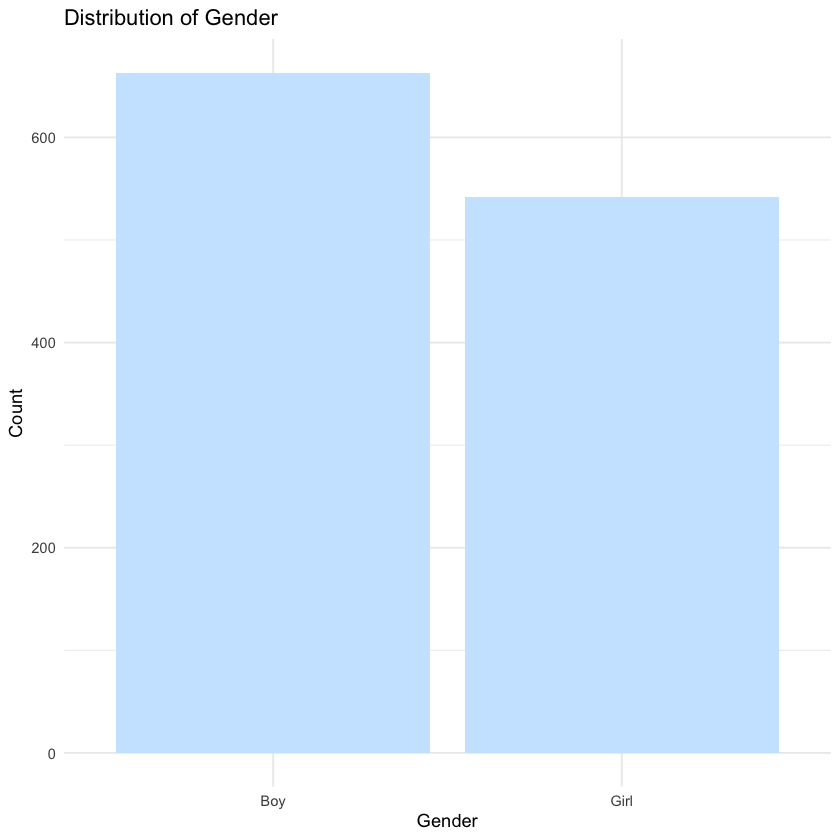

In [26]:
# Univariate Analysis of Original Variables: Gender

# Frequency table
library(ggplot2)

# Frequency table
# Univariate Analysis of Original Variables: Gender

# Frequency table
gender_table <- table(data$gender)
print(gender_table)

# Bar plot
ggplot(data, aes(x = gender)) +
  geom_bar(fill = "#cce6ff") +
  labs(title = "Distribution of Gender", x = "Gender", y = "Count") +
  theme_minimal()


   College     School University 
       219        530        456 


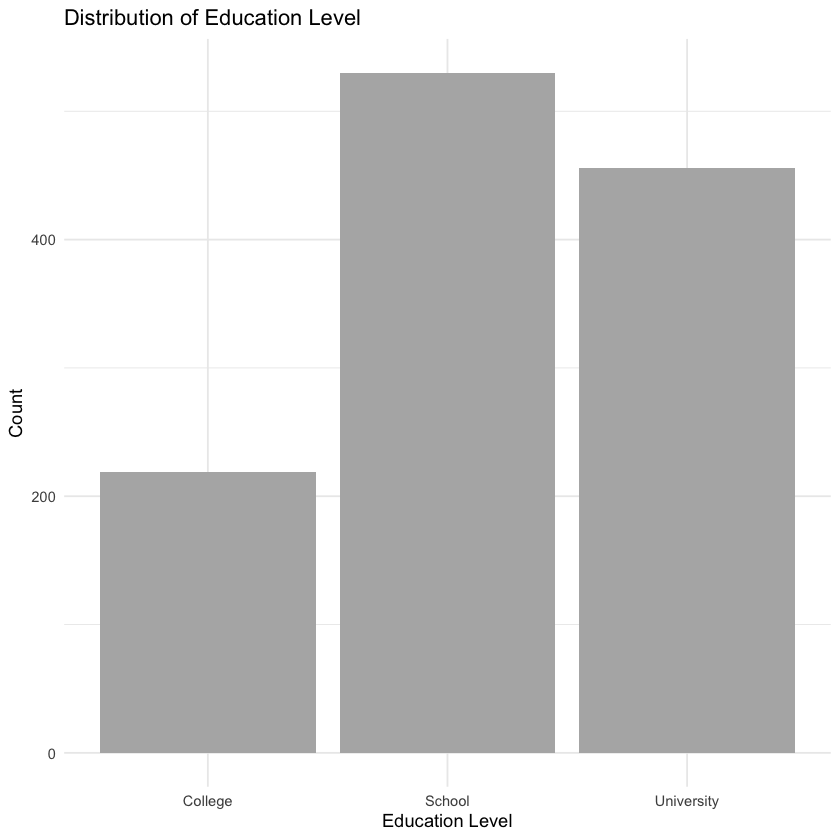

In [32]:
# Univariate Analysis of Original Variables: Education Level

# Frequency table
education_table <- table(data$education_level)
print(education_table)


# Bar plot
ggplot(data, aes(x = education_level)) +
  geom_bar(fill = "#b3b3b3") +
  labs(title = "Distribution of Education Level", x = "Education Level", y = "Count") +
  theme_minimal()


 Mid Poor Rich 
 878  242   85 


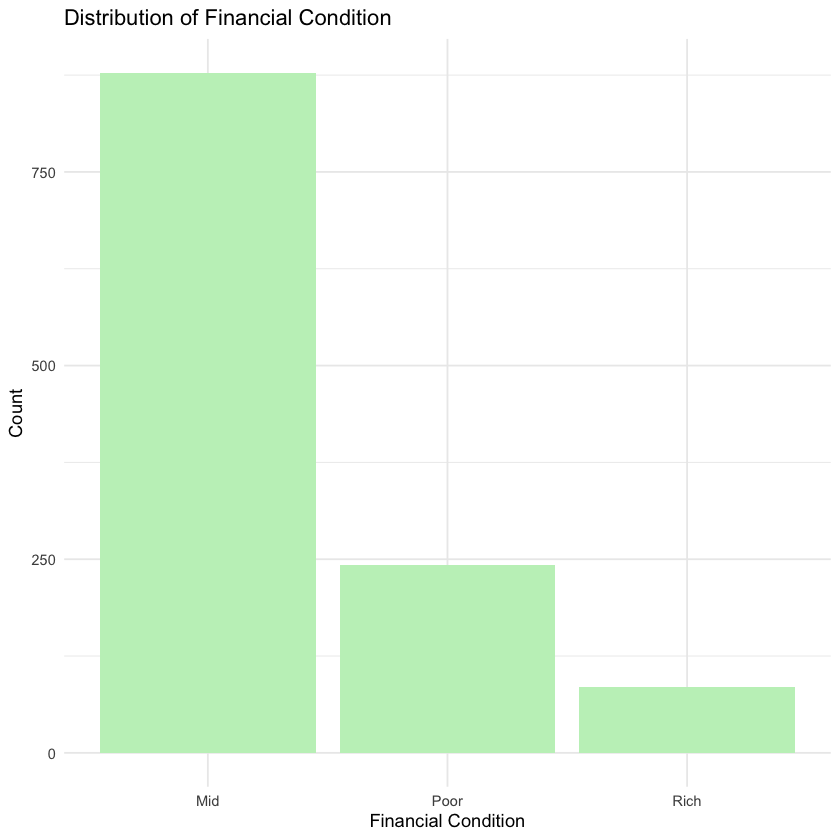

In [28]:
# Univariate Analysis of Original Variables: Financial Condition

# Frequency table
financial_table <- table(data$financial_condition)
print(financial_table)

# Bar plot
ggplot(data, aes(x = financial_condition)) +
  geom_bar(fill = "#c2f0c2") +
  labs(title = "Distribution of Financial Condition", x = "Financial Condition", y = "Count") +
  theme_minimal()


Mobile Data        Wifi 
        695         510 


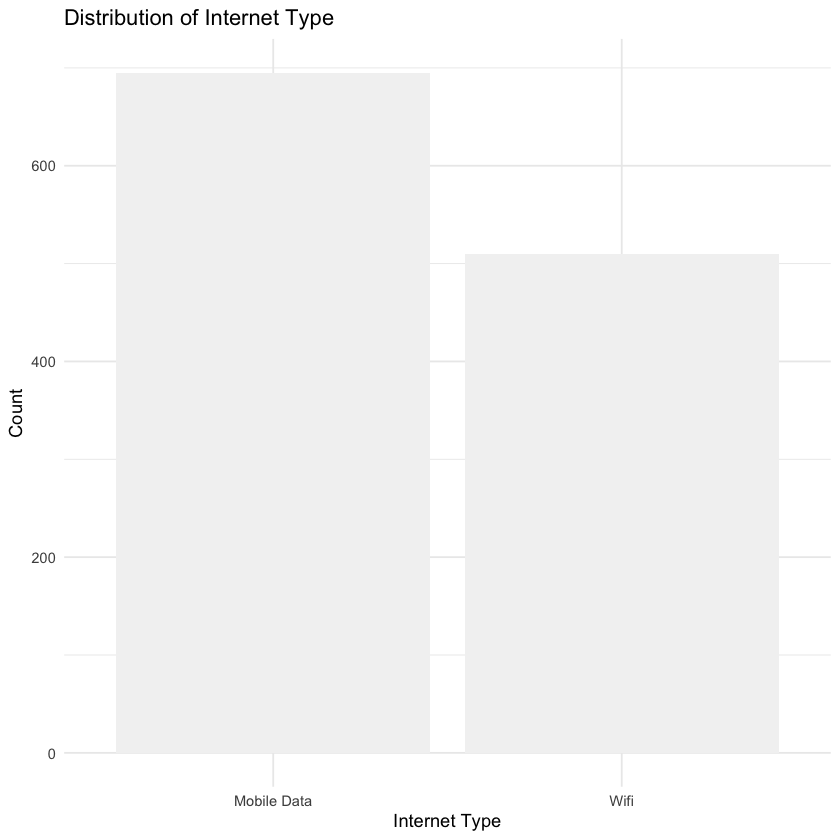

In [33]:
# Univariate Analysis of Original Variables: Internet Type

# Frequency table
internet_table <- table(data$internet_type)
print(internet_table)

# Bar plot
ggplot(data, aes(x = internet_type)) +
  geom_bar(fill = "#f2f2f2") +
  labs(title = "Distribution of Internet Type", x = "Internet Type", y = "Count") +
  theme_minimal()


 2G  3G  4G 
 19 411 775 


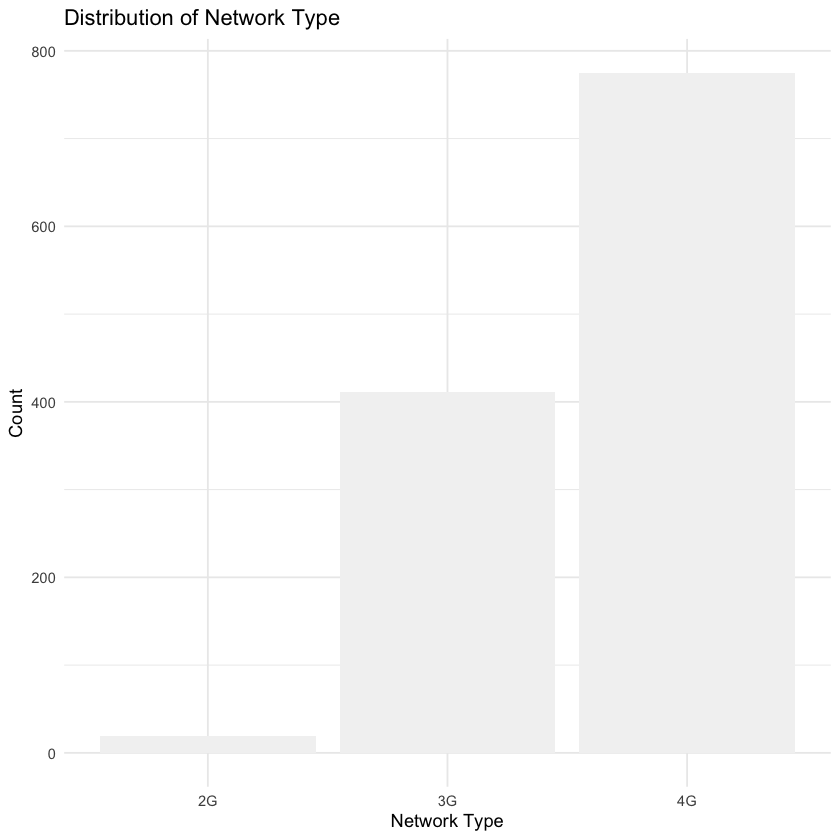

In [34]:
# Univariate Analysis of Original Variables: Network Type

# Frequency table
network_table <- table(data$network_type)
print(network_table)

# Bar plot
ggplot(data, aes(x = network_type)) +
  geom_bar(fill = "#f2f2f2") +
  labs(title = "Distribution of Network Type", x = "Network Type", y = "Count") +
  theme_minimal()


Computer   Mobile      Tab 
     162     1013       30 


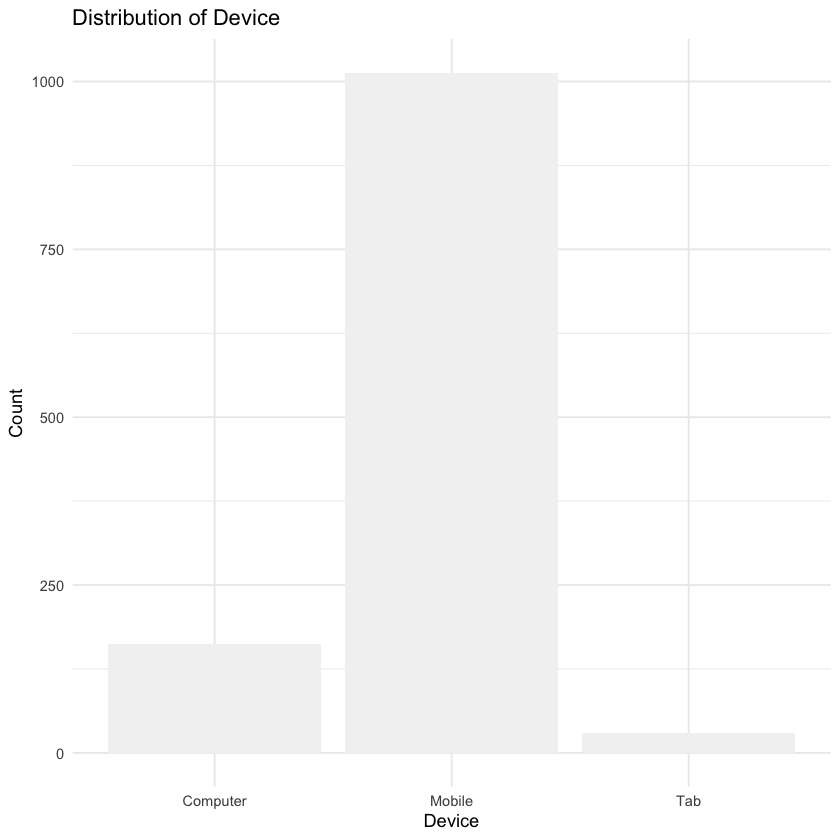

In [36]:
# Univariate Analysis of Original Variables: Device

# Frequency table
device_table <- table(data$device)
print(device_table)

# Bar plot
ggplot(data, aes(x = device)) +
  geom_bar(fill = "#f2f2f2") +
  labs(title = "Distribution of Device", x = "Device", y = "Count") +
  theme_minimal()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   13.00   18.00   17.22   23.00   28.00 

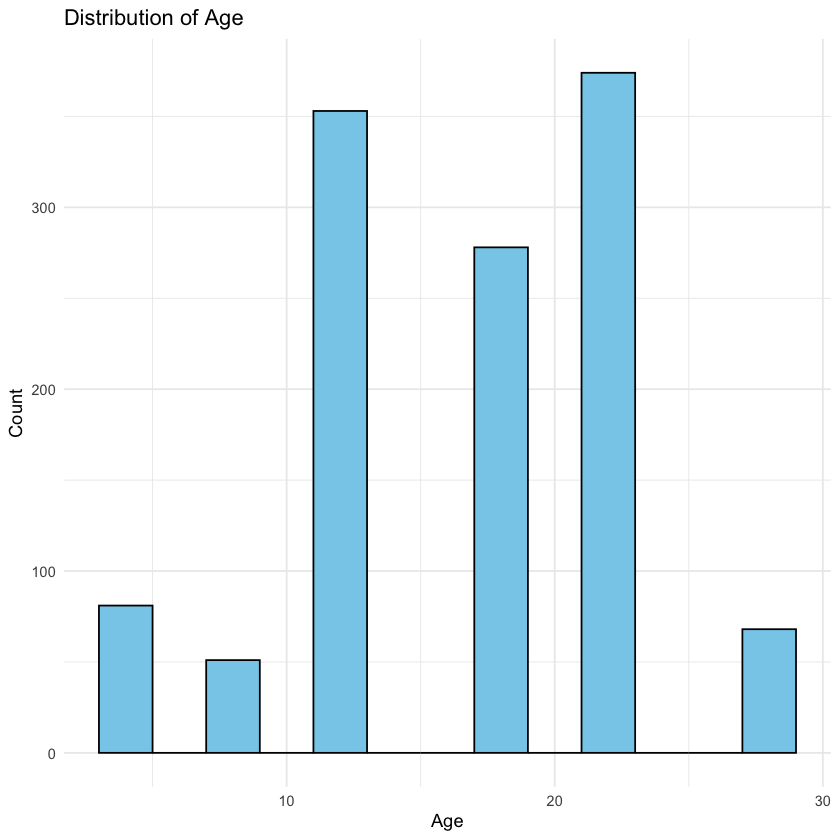

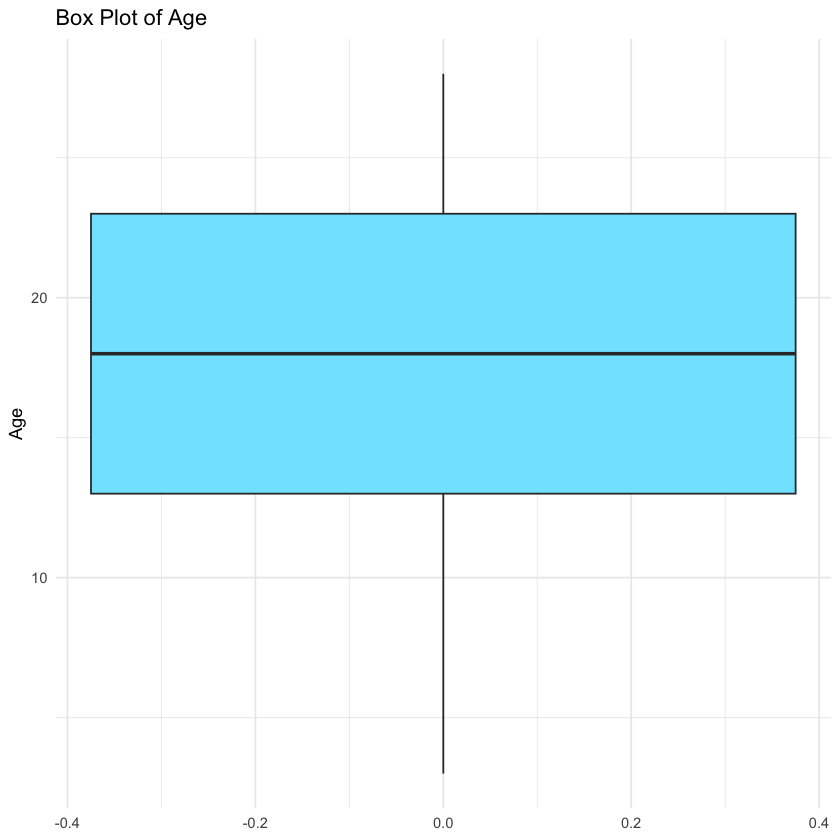

In [39]:
# Univariate Analysis of Original Variables: Age Numeric

# Summary statistics
summary(data$age_numeric)

# Histogram
ggplot(data, aes(x = age_numeric)) +
  geom_histogram(binwidth = 2, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Age", x = "Age", y = "Count") +
  theme_minimal()

# Box plot
ggplot(data, aes(y = age_numeric)) +
  geom_boxplot(fill = "#80e5ff") +
  labs(title = "Box Plot of Age", y = "Age") +
  theme_minimal()